**ROTACIÓN DE CLIENTES BANCARIOS**

Análisis del abandono de clientes pertenecientes a un Banco a través de diferentes variables, dando insigth's que permitan generar campañas y ofertas de fidelización para clientes con riesgo de abandono. Implementación de modelo que permita clasificar y dar resultados de la probabilidad de abandono. El Dashboard fue generado en Power BI.

1. Zonas que presentan mayor tasa de abandono.

2. Análisis por numero de productos, tasa, distinguido por genero. Asumiendo a clientes con T.C.

3. Análisis por edad, generando rangos con el fin de ver la mayor concentración de población. Tasa de abandono

4. Saldo, generación de rangos para la concentración de la mayor deuda, extendiendo el análisis por edad.

5. Implementación de modelo Machine Learning, para dar la probabilidad de abandono para cada clientes.

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
bank = pd.DataFrame(data = pd.read_csv("Customer-Churn-Records.csv"))
bank.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [177]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [178]:
bank.isna().sum().sort_values(ascending = False)

RowNumber             0
CustomerId            0
Card Type             0
Satisfaction Score    0
Complain              0
Exited                0
EstimatedSalary       0
IsActiveMember        0
HasCrCard             0
NumOfProducts         0
Balance               0
Tenure                0
Age                   0
Gender                0
Geography             0
CreditScore           0
Surname               0
Point Earned          0
dtype: int64

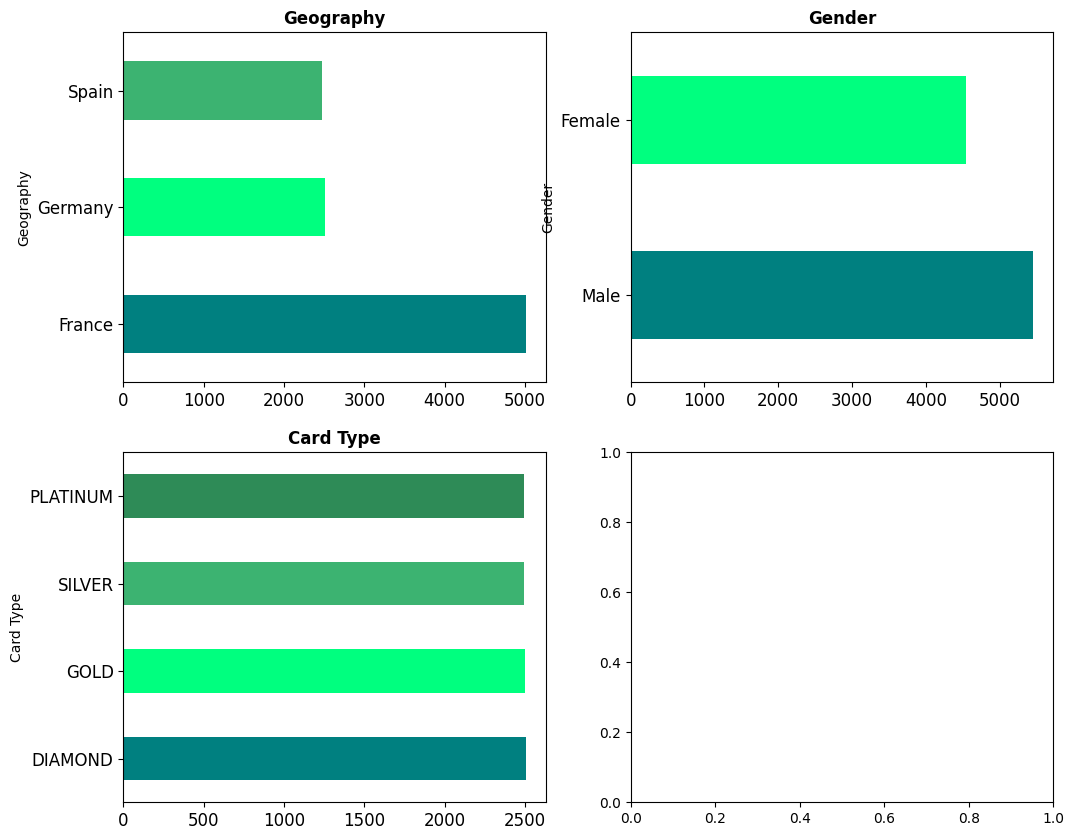

In [179]:
def graficos_categoricos(cat):
    from math import ceil
    filas = ceil(cat.shape[1]/2)

    fig, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (12, filas * 5))
    ax = ax.flat 

    for cada, variable in enumerate(cat):
        colors = ["teal", "springgreen", "mediumseagreen", "seagreen"]
        cat[variable].value_counts().plot.barh(ax = ax[cada], color = colors)
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)


graficos_categoricos(bank.select_dtypes("O").drop(columns=["Surname"]))

In [180]:
def var_numericas(dataframe):
    estadistica = dataframe.describe().T
    estadistica["media"] = dataframe.median()
    estadistica = estadistica.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return estadistica

var_numericas(bank.select_dtypes("number"))

,count,mean,media,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,1.569074e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,6.520000e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,3.700000e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,5.000000e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,9.719854e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,1.000000e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,1.000000e+00,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,1.000000e+00,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,1.001939e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [181]:
bank.drop(columns = "Complain", inplace = True)
bank.drop(columns = "Point Earned", inplace = True)
bank.drop(columns = "RowNumber", inplace = True)
bank.drop(columns = "CustomerId", inplace = True)
bank.drop(columns = "Card Type", inplace = True)
bank.drop(columns = "Surname", inplace = True)
bank.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3


**BUSINESS ANALYTICS**

In [182]:
abandono_yes = bank[bank["Exited"] == 1].shape[0]
poblacion = bank["Exited"].shape[0]
x = np.round((abandono_yes / poblacion) * 100, 3)

print(f"La tasa de abandono es del {x}% para los {poblacion} clientes en la base de datos")

La tasa de abandono es del 20.38% para los 10000 clientes en la base de datos


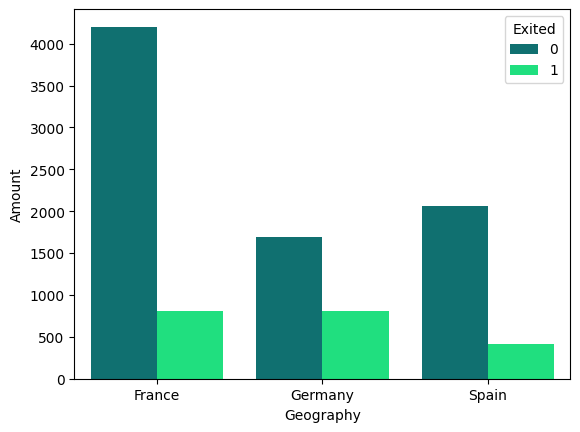

In [183]:
geo = bank.groupby(["Geography", "Exited"])["Exited"].count().reset_index(name = "Amount")

colors = ["teal", "springgreen"] 
sns.barplot(data = geo, x = "Geography" , y = "Amount", hue = "Exited", palette = colors)
plt.show()

In [184]:
geo = pd.pivot_table(data = geo, values = "Amount", columns = "Exited", index = "Geography")
geo["Tasa_Abandono"] = np.round(geo.iloc[:,1] / (geo.iloc[:,0] + geo.iloc[:,1]), 4) * 100
geo["Poblacion_total"] = geo.iloc[:,0] + geo.iloc[:,1]
geo

Exited,0,1,Tasa_Abandono,Poblacion_total
Geography,,,,
France,4203,811,16.17,5014
Germany,1695,814,32.44,2509
Spain,2064,413,16.67,2477


2. Análisis por numero de productos, tasa, distinguido por genero. Asumiendo a clientes con T.C.


In [185]:
bank["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

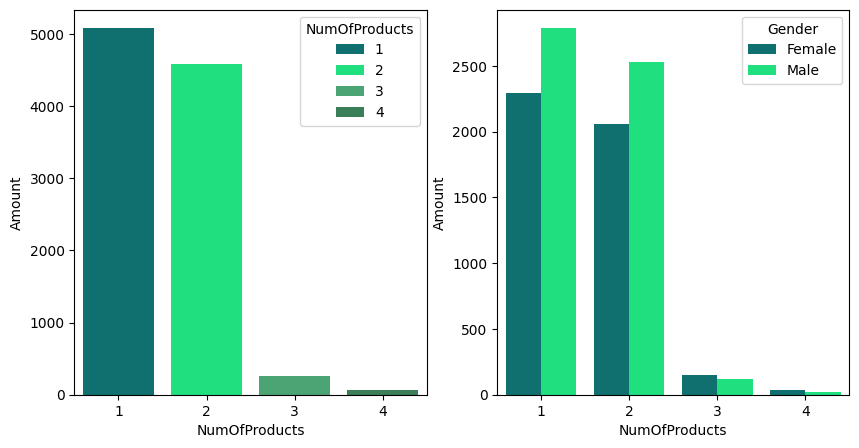

In [186]:
x_1 = bank.groupby("NumOfProducts").size().reset_index(name = "Amount")
x_2 = bank.groupby(["NumOfProducts", "Gender"]).size().reset_index(name = "Amount")

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

colors = ["teal", "springgreen"]
colors_2 = ["teal", "springgreen", "mediumseagreen", "seagreen"]
sns.barplot(x_1, x = "NumOfProducts", y = "Amount", hue = 'NumOfProducts', ax = axes[0], palette = colors_2)
sns.barplot(x_2, x = "NumOfProducts", y = "Amount", hue = 'Gender', ax = axes[1], palette = colors)

plt.show()

In [187]:
# Female: 4.543
# Male: 5.457

gender_exited = bank.groupby(["Gender", "Exited"]).size().reset_index(name = "Quantity")
gender_exited = pd.pivot_table(data = gender_exited, index = "Gender", values = "Quantity", columns = "Exited")
gender_exited["Poblacion_total"] = gender_exited.sum(axis = 1)
gender_exited["Tasa_Abandono"] = np.round(gender_exited.iloc[:,1] / gender_exited["Poblacion_total"],3) * 100
gender_exited

Exited,0,1,Poblacion_total,Tasa_Abandono
Gender,,,,
Female,3404,1139,4543,25.1
Male,4558,899,5457,16.5


In [188]:
gender_product = bank.groupby(["Gender", "NumOfProducts", "Exited"]).size().reset_index(name = "Gender_Am")
gender_product = pd.pivot_table(data = gender_product, index = ["Gender", "Exited"], values = "Gender_Am", columns = "NumOfProducts")
gender_product["Poblacion_total"] = gender_product.sum(axis = 1) #Fila 1, Columna 0
gender_product

NumOfProducts       1       2      3     4  Poblacion_total
Gender Exited                                              
Female 0       1534.0  1850.0   20.0   NaN           3404.0
       1        762.0   210.0  129.0  38.0           1139.0
Male   0       2141.0  2391.0   26.0   NaN           4558.0
       1        647.0   139.0   91.0  22.0            899.0

**Tarjeta de Crédito (TC)**

Tasa de abandono para clientes que cuentan con tarjeta de crétido que aun siguen con el banco o abandonaron.

In [189]:
bank.HasCrCard.value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

   Gender  Quantity_TC_Gender
0  Female                3192
1    Male                3863


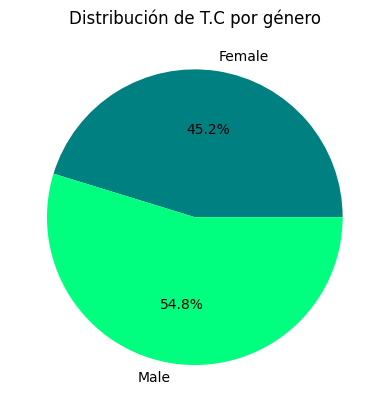

In [190]:
bank_2 = bank[bank["HasCrCard"] == 1]
gender_TC = bank_2.groupby("Gender")["HasCrCard"].size().reset_index(name = "Quantity_TC_Gender")
print(gender_TC)

colors = ["teal", "springgreen"]
plt.pie(gender_TC["Quantity_TC_Gender"], labels = gender_TC["Gender"], colors = colors, autopct='%1.1f%%')
plt.title("Distribución de T.C por género")
plt.show()

In [191]:
bank_2 = bank[bank["HasCrCard"] == 1]
x = bank_2.groupby(["Gender", "Exited"])["Exited"].count().reset_index(name = "Quantity")
x["tasa_abandono"] = np.round(x["Quantity"] / bank_2.shape[0], 3) * 100
x.loc[x["Exited"] == 1]

,Gender,Exited,Quantity,tasa_abandono
1,Female,1,795,11.3
3,Male,1,630,8.9


3. Análisis por edad, generando rangos con el fin de ver la mayor concentración de población. Tasa de abandono

In [192]:
bank["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

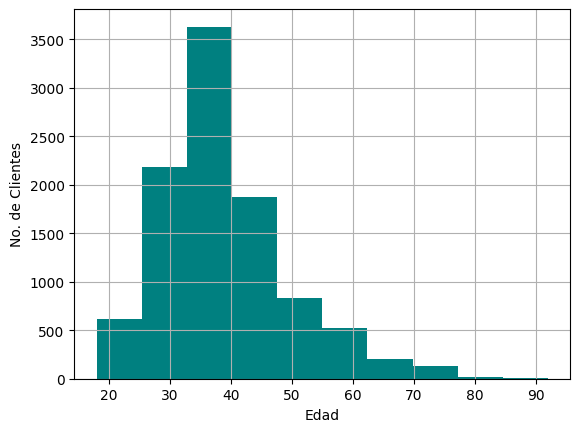

In [193]:
bank["Age"].hist(color = "teal")
plt.xlabel("Edad")
plt.ylabel("No. de Clientes")
plt.show()

In [194]:
age = bank[["Age", "Exited"]]

In [195]:
def edad(dataframe, variable):
     if variable <= 20:
          return "Menor de 20"
     elif  20 < variable <= 30:
          return "Entre 20 y 30"
     elif 30 < variable <= 40:
          return "Entre 30 y 40"
     elif 40 < variable <= 50:
          return "Entre 40 y 50"
     elif 50 < variable <= 60:
          return "Entre 50 y 60"
     elif 60 < variable:
          return "Mayor de 60"
     return dataframe


age["Age"] = age["Age"].astype(int)
bank["Age"] = bank["Age"].astype(int)

age["Rango_edad"] = age["Age"].apply(lambda x: edad(age, x))
bank["Rango_edad"] = bank["Age"].apply(lambda x: edad(bank, x))

C:\Users\pablo\AppData\Local\Temp\ipykernel_6844\940911873.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age["Age"] = age["Age"].astype(int)
C:\Users\pablo\AppData\Local\Temp\ipykernel_6844\940911873.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age["Rango_edad"] = age["Age"].apply(lambda x: edad(age, x))


In [196]:
conteo_edad = age.groupby(["Rango_edad", "Exited"])["Exited"].count().reset_index(name = "Amount")
conteo_edad = pd.pivot_table(data = conteo_edad, values = "Amount", index = "Rango_edad", columns = "Exited")
conteo_edad["Poblacion_total"] = conteo_edad.sum(axis = 1)
conteo_edad["Tasa_abandono"] = np.round(conteo_edad.iloc[:,1]/ conteo_edad.Poblacion_total, 3) * 100
conteo_edad

Exited,0,1,Poblacion_total,Tasa_abandono
Rango_edad,,,,
Entre 20 y 30,1736,143,1879,7.6
Entre 30 y 40,3912,539,4451,12.1
Entre 40 y 50,1532,788,2320,34.0
Entre 50 y 60,349,448,797,56.2
Mayor de 60,349,115,464,24.8
Menor de 20,84,5,89,5.6


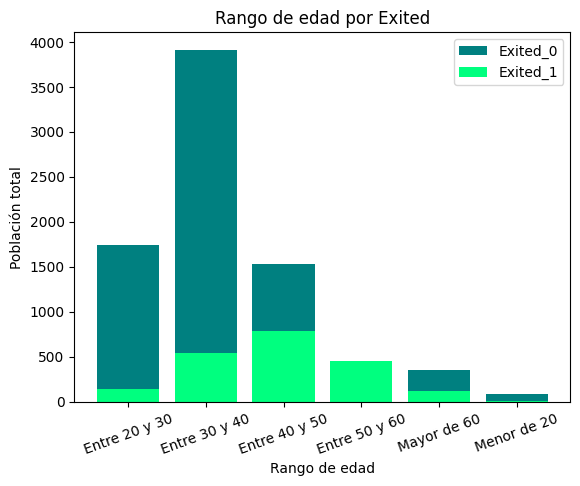

In [197]:
plt.bar(conteo_edad.index, conteo_edad[0], label="Exited_0", color = "teal")
plt.bar(conteo_edad.index, conteo_edad[1], label="Exited_1", color = "springgreen")

plt.xlabel("Rango de edad")
plt.ylabel("Población total")
plt.title("Rango de edad por Exited")
plt.xticks(rotation = 20)
plt.legend()
plt.show()

4. Saldo, generación de rangos para la concentración de la mayor deuda, extendiendo el análisis por edad.

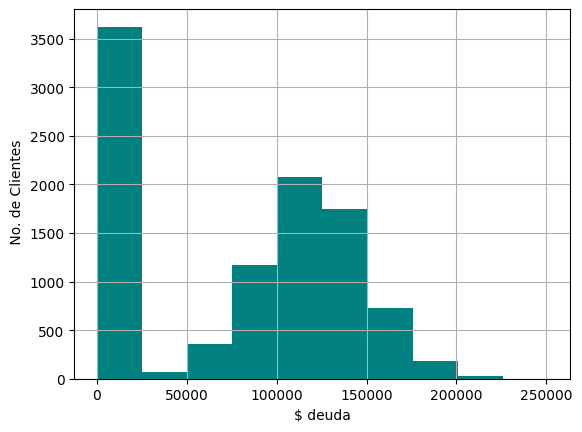

In [198]:
bank["Balance"].hist(color = "teal")
plt.xlabel("$ deuda")
plt.ylabel(" No. de Clientes")
plt.show()

In [199]:

def saldo(dataframe, variable):
    if variable <= 52000:
        return "Menor a 52k"
    elif 52000 < variable <= 104000:
        return "Entre 52k y 104k"
    elif 104000 < variable <= 156000:
        return "Entre 104k y 156k"
    elif 156000 < variable <= 208000:
        return "Entre 156k y 208k"
    elif 208000 < variable:
        return "Mayor a 208k"
    return dataframe


bank["Balance"] = bank["Balance"].astype(int)
bank["Rango_saldo"] = bank["Balance"].apply(lambda x: saldo(bank, x))

In [200]:
bank_saldo = bank.groupby(["Rango_saldo", "Exited"]).size().reset_index(name = "Quantity").sort_values("Rango_saldo")
bank_saldo_sol = pd.pivot_table(bank_saldo, index = "Rango_saldo", columns = "Exited", values = "Quantity")
bank_saldo_sol["Poblacion_total"] = bank_saldo_sol.sum(axis = 1)
bank_saldo_sol["Tasa_abandono"] = np.round(bank_saldo_sol.iloc[:,1] / bank_saldo_sol["Poblacion_total"], 3) * 100
bank_saldo_sol = bank_saldo_sol.sort_values(by = "Tasa_abandono", ascending = False)
bank_saldo_sol

Exited,0,1,Poblacion_total,Tasa_abandono
Rango_saldo,,,,
Mayor a 208k,6,10,16,62.5
Entre 104k y 156k,2828,982,3810,25.8
Entre 156k y 208k,528,156,684,22.8
Entre 52k y 104k,1427,361,1788,20.2
Menor a 52k,3173,529,3702,14.3


C:\Users\pablo\AppData\Local\Temp\ipykernel_6844\660994868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(bank_saldo_sol, x = "Rango_saldo", y = "Tasa_abandono", palette = colors)
C:\Users\pablo\AppData\Local\Temp\ipykernel_6844\660994868.py:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(bank_saldo_sol, x = "Rango_saldo", y = "Tasa_abandono", palette = colors)


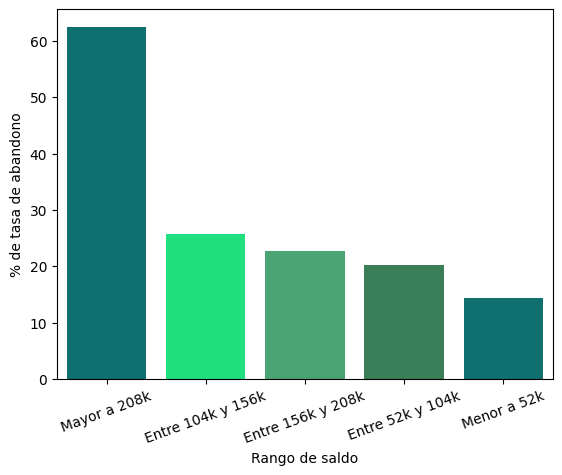

In [201]:
colors = ["teal", "springgreen", "mediumseagreen", "seagreen"]
sns.barplot(bank_saldo_sol, x = "Rango_saldo", y = "Tasa_abandono", palette = colors)
plt.xlabel("Rango de saldo")
plt.ylabel("% de tasa de abandono")
plt.xticks(rotation = 20)
plt.show()

5. Implementación de modelo Machine Learning, para dar la probabilidad de abandono para cada clientes.

In [205]:
bank.drop(columns = ["CreditScore", 
                     "Balance", 
                     "Age", 
                     "EstimatedSalary", "IsActiveMember"], inplace = True)

bank.shape

(10000, 9)

In [204]:
df = bank.copy()
df

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,Exited,Satisfaction Score,Rango_edad,Rango_saldo
0,France,Female,2,1,1,1,2,Entre 40 y 50,Menor a 52k
1,Spain,Female,1,1,0,0,3,Entre 40 y 50,Entre 52k y 104k
2,France,Female,8,3,1,1,3,Entre 40 y 50,Entre 156k y 208k
3,France,Female,1,2,0,0,5,Entre 30 y 40,Menor a 52k
4,Spain,Female,2,1,1,0,5,Entre 40 y 50,Entre 104k y 156k
...,...,...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,1,Entre 30 y 40,Menor a 52k
9996,France,Male,10,1,1,0,5,Entre 30 y 40,Entre 52k y 104k
9997,France,Female,7,1,0,1,3,Entre 30 y 40,Menor a 52k
9998,Germany,Male,3,2,1,1,2,Entre 40 y 50,Entre 52k y 104k


In [210]:
from sklearn.preprocessing import OneHotEncoder

cat = df.select_dtypes("O")
ohe = OneHotEncoder(sparse = False)

ohe.fit(cat)

cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, 
                       columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)
var_num = df.select_dtypes("number").reset_index(drop = True)

df = pd.concat([cat_ohe, var_num], axis = 1)
df.head(2)

c:\Users\pablo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Rango_edad_Entre 20 y 30,Rango_edad_Entre 30 y 40,Rango_edad_Entre 40 y 50,Rango_edad_Entre 50 y 60,Rango_edad_Mayor de 60,...,Rango_saldo_Entre 104k y 156k,Rango_saldo_Entre 156k y 208k,Rango_saldo_Entre 52k y 104k,Rango_saldo_Mayor a 208k,Rango_saldo_Menor a 52k,Tenure,NumOfProducts,HasCrCard,Exited,Satisfaction Score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2,1,1,1,2
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,1,0,0,3


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns = "Exited")
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3)

model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)

predict = model.predict_proba(X_test)[:,1]
predict[:20]

array([0.12694301, 0.12694301, 0.06744186, 0.0462963 , 0.0195122 ,
       0.24583333, 0.66071429, 0.0462963 , 0.12694301, 0.06744186,
       0.0195122 , 0.0195122 , 0.0195122 , 0.23404255, 0.06744186,
       0.66071429, 0.24583333, 0.0462963 , 0.06744186, 0.12694301])

In [212]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predict)

0.8106571630870899

In [219]:
#from sklearn.tree import plot_tree
#
#plt.figure(figsize = (50,50))
#plot_tree(model,
#          feature_names= X_test.columns,
#          impurity = False,
#          node_ids = True,
#          proportion = True,
#          rounded = True,
#          precision = 2)
#plt.show()

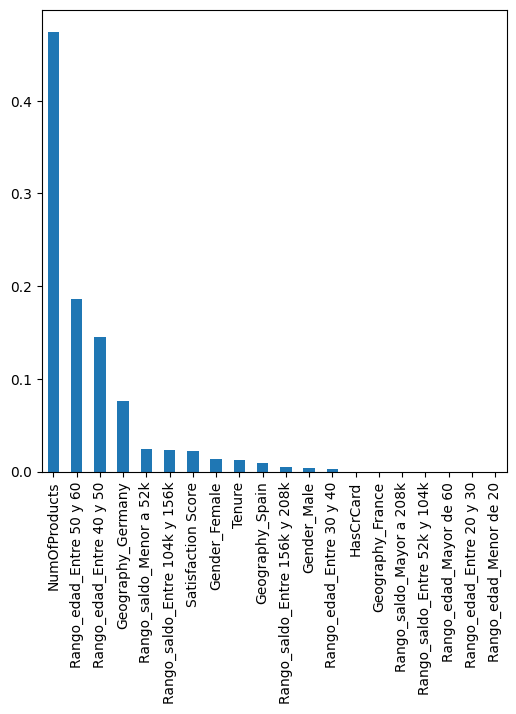

In [218]:
pd.Series(model.feature_importances_, 
          index = X_test.columns).sort_values(ascending = False).plot(kind="bar", figsize = (6,6))
plt.show()

Como vimos a lo largo de este proyecto, uno de los perfiles que estaria con una de las más altas probabilidades de abandono son:
- Personas entre los 40 y 60 años
- Personas con más de un producto
- Con una deuda menor a 52k
- Personas que marquen en la geografia Alemania

Lo anterior es solo un perfil de los distintos que pudiesen haber.

In [228]:
bank["Prob_Abandono"] = model.predict_proba(df.drop(columns = "Exited"))[:,1]
bank.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,Exited,Satisfaction Score,Rango_edad,Rango_saldo,Prob_Abandono
8921,France,Female,1,2,1,0,3,Entre 30 y 40,Menor a 52k,0.481481
5757,France,Male,3,2,1,0,5,Entre 30 y 40,Entre 104k y 156k,0.481481
8659,Spain,Male,5,1,1,0,5,Entre 20 y 30,Entre 156k y 208k,1.000000
2500,France,Male,10,2,0,0,1,Entre 30 y 40,Menor a 52k,0.046296
7543,France,Male,1,2,1,0,2,Entre 40 y 50,Menor a 52k,0.234043


In [229]:
bank.to_excel("Clientes_Banco_abandono.xlsx")